# DengAI: Predicting Disease Spread

Predicting local epidemics of dengue fever to help fight life-threatening pandemics.

This project predicts the number of dengue fever cases reported each week in the following locations:

- San Juan (Puerto Rico)
- Iquitos (Peru)

The predictor variables include environmental variables describing changes in temperature, precipitation, vegitation, and more.

This is a **time series** problem because we need to predict cases on the bases of time (`weekofyear`) and 

# Understand Problem

The DrivenData website has a useful [Problem description](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/82/).

Goal is to predict `total_cases` label for each `city`, `year`, `weekofyear` in test set.

This is a prediction problem with `3` target variables:

- `city`
- `year`
- `weekofyear`

## `city`

Categorical variable with two levels:

- San Juan (Puerto Rico) recorded as `sj`
- Iquitos (Peru) recorded as `iq`

Missing values are recorded as `NaN`

# Performance Metric

Performance evaluated using `mean absolute error` (MAE): [Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error)

# Submission Format

A `.csv` file with the following columns:

- `city` (`sj` or `iq`)
- `year` (year)
- `weekofyear` (integer 1-52)
- `total_cases` (integer values)

# Benchmark Walkthrough

There's a [Benchmark Walkthrough](https://www.drivendata.co/blog/dengue-benchmark/) guide, which I'll only check if I run into trouble.

# Download Data

- Create an account on [Driven Data](https://www.drivendata.org)
- Join the practice competition **DengAI: Predicting Disease Spread**
- Download the data from the [data](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/data/) page.
- Move the files to `../data/`

# Load Modules

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Inspect Data


# Inspect Submission Format


The submission format is a `.csv` file:

- `417` rows
- 1st row is columns: `city`, `year`, `weekofyear`, `total_cases`

In [2]:
!head -10 '../data/submission_format.csv'

city,year,weekofyear,total_cases
sj,2008,18,0
sj,2008,19,0
sj,2008,20,0
sj,2008,21,0
sj,2008,22,0
sj,2008,23,0
sj,2008,24,0
sj,2008,25,0
sj,2008,26,0


In [3]:
!wc '../data/submission_format.csv'

 417  417 5369 ../data/submission_format.csv


# Inspect Target Values (labels)

The `dengue_labels_train.csv` file:

- `1457` rows (cases)
- 1st row is columns: `city`, `year`, `weekofyear`, `total_cases` (same as `submission_format.csv`)

In [4]:
!head -10 '../data/dengue_labels_train.csv'

city,year,weekofyear,total_cases
sj,1990,18,4
sj,1990,19,5
sj,1990,20,4
sj,1990,21,3
sj,1990,22,6
sj,1990,23,2
sj,1990,24,4
sj,1990,25,5
sj,1990,26,10


In [5]:
!wc '../data/dengue_labels_train.csv'

 1457  1457 19582 ../data/dengue_labels_train.csv


# Inspect Training Set Features

- `1457` rows (same as `dengue_labels_train.csv`)
- Many columns! The first three are the same as the other files: `city`, `year`, `weekofyear`, excluding `total_cases`

In [6]:
!head -10 '../data/dengue_features_train.csv'

city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
sj,1990,18,1990-04-30,0.1226,0.103725,0.1984833,0.1776167,12.42,297.572857143,297.742857143,292.414285714,299.8,295.9,32.0,73.3657142857,12.42,14.0128571429,2.62857142857,25.4428571429,6.9,29.4,20.0,16.0
sj,1990,19,1990-05-07,0.1699,0.142175,0.1623571,0.1554857,22.82,298.211428571,298.442857143,293.951428571,300.9,296.4,17.94,77.3685714286,22.82,15.3728571429,2.37142857143,26.7142857143,6.37142857143,31.7,22.2,8.6
sj,1990,20,1990-05-14,0.03225,0.1729667,0.1572,0.1708429,34.54,298.781428571,298.878571429,295.434285714,300.5,297.

In [7]:
!wc '../data/dengue_features_train.csv'

  1457   1457 287139 ../data/dengue_features_train.csv


# Inspect Test Set

- `417` rows (same as `submission_format.csv`)
- Looks like the same columns as `dengue_features_train.csv`

In [8]:
!head -10 '../data/dengue_features_test.csv'

city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
sj,2008,18,2008-04-29,-0.0189,-0.0189,0.1027286,0.0912,78.6,298.492857143,298.55,294.527142857,301.1,296.4,25.37,78.7814285714,78.6,15.9185714286,3.12857142857,26.5285714286,7.05714285714,33.3,21.7,75.2
sj,2008,19,2008-05-06,-0.018,-0.0124,0.08204286,0.07231429,12.56,298.475714286,298.557142857,294.395714286,300.8,296.7,21.83,78.23,12.56,15.7914285714,2.57142857143,26.0714285714,5.55714285714,30.0,22.2,34.3
sj,2008,20,2008-05-13,-0.0015,,0.1510833,0.09152857,3.66,299.455714286,299.357142857,295.308571429,302.2,296.4,4.12,78.27,

In [9]:
!wc '../data/dengue_features_test.csv'

  417   417 82465 ../data/dengue_features_test.csv


# Import Data

In [10]:
submission_format = pd.read_csv('../data/submission_format.csv')
train_features = pd.read_csv('../data/dengue_features_train.csv')
train_labels = pd.read_csv('../data/dengue_labels_train.csv')
test_features = pd.read_csv('../data/dengue_features_test.csv')


# Inspect Data with Pandas

- `year` and `weekofyear` have same summaries for `train_features` and `train_labels`
- there are many columns (features):

```
['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
```

In [11]:
train_features

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [12]:
submission_format.describe()

,year,weekofyear,total_cases
count,416.000000,416.000000,416.0
mean,2010.766827,26.439904,0.0
std,1.434835,14.978257,0.0
min,2008.000000,1.000000,0.0
25%,2010.000000,13.750000,0.0
50%,2011.000000,26.000000,0.0
75%,2012.000000,39.000000,0.0
max,2013.000000,53.000000,0.0


In [13]:
submission_format.columns

Index(['city', 'year', 'weekofyear', 'total_cases'], dtype='object')

In [14]:
train_features.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [15]:
train_features.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [16]:
train_features.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [17]:
train_labels.describe()

,year,weekofyear,total_cases
count,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,24.675137
std,5.408314,15.019437,43.596000
min,1990.000000,1.000000,0.000000
25%,1997.000000,13.750000,5.000000
50%,2002.000000,26.500000,12.000000
75%,2005.000000,39.250000,28.000000
max,2010.000000,53.000000,461.000000


In [18]:
train_labels.columns

Index(['city', 'year', 'weekofyear', 'total_cases'], dtype='object')

In [19]:
test_features.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,416.000000,416.000000,373.000000,405.000000,415.000000,415.000000,414.000000,414.000000,414.000000,414.000000,...,414.000000,414.000000,414.000000,414.000000,414.000000,404.000000,404.000000,413.000000,407.000000,411.000000
mean,2010.766827,26.439904,0.126050,0.126803,0.207702,0.201721,38.354324,298.818295,299.353071,295.419179,...,42.171135,82.499810,38.354324,16.927088,5.124569,27.369587,7.810991,32.534625,22.368550,34.278589
std,1.434835,14.978257,0.164353,0.141420,0.079102,0.092028,35.171126,1.469501,1.306233,1.523099,...,48.909514,7.378243,35.171126,1.557868,3.542870,1.232608,2.449718,1.920429,1.731437,34.655966
min,2008.000000,1.000000,-0.463400,-0.211800,0.006200,-0.014671,0.000000,294.554286,295.235714,290.818571,...,0.000000,64.920000,0.000000,12.537143,1.485714,24.157143,4.042857,27.200000,14.200000,0.000000
25%,2010.000000,13.750000,-0.001500,0.015975,0.148670,0.134079,8.175000,297.751429,298.323214,294.335714,...,9.430000,77.397143,8.175000,15.792857,2.446429,26.514286,5.928571,31.100000,21.200000,9.100000
50%,2011.000000,26.000000,0.110100,0.088700,0.204171,0.186471,31.455000,298.547143,299.328571,295.825000,...,25.850000,80.330000,31.455000,17.337143,2.914286,27.483333,6.642857,32.800000,22.200000,23.600000
75%,2012.000000,39.000000,0.263329,0.242400,0.254871,0.253243,57.772500,300.240357,300.521429,296.643571,...,56.475000,88.328929,57.772500,18.174643,8.171429,28.319048,9.812500,33.900000,23.300000,47.750000
max,2013.000000,53.000000,0.500400,0.649000,0.453043,0.529043,169.340000,301.935714,303.328571,297.794286,...,301.400000,97.982857,169.340000,19.598571,14.485714,30.271429,14.725000,38.400000,26.700000,212.000000


In [20]:
test_features.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

# Inspect NA Values

We examined `train_features` and `train_labels` for NA (Not Available) values

We discovered:

- `NA` values for all features except `city`, `year`, `weekofyear`, `week_start_date`
- Total `NA` sum in `train_features`: `548`
- Total `NA` sum in `test_features`: `119`
- Largest `NA` count for `ndvi_ne` (Pixedl northweast of city centroid)
- Range between `10` and `194` `NA` values

Without domain knowledge, it's difficult to know if these `NA` values matter!

Let's plot `NA` values


In [21]:
train_features.isna().sum().sum()

548

In [22]:
train_features.isna().sum().sort_values()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
reanalysis_tdtr_k                         10
reanalysis_specific_humidity_g_per_kg     10
reanalysis_relative_humidity_percent      10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_min_air_temp_k                 10
reanalysis_max_air_temp_k                 10
reanalysis_dew_point_temp_k               10
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
precipitation_amt_mm                      13
reanalysis_sat_precip_amt_mm              13
station_min_temp_c                        14
station_max_temp_c                        20
ndvi_sw                                   22
ndvi_se                                   22
station_precip_mm                         22
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
ndvi_nw   

In [23]:
train_labels.isna().sum()

city           0
year           0
weekofyear     0
total_cases    0
dtype: int64

In [24]:
test_features.isna().sum().sum()

119

In [25]:
test_features.isna().sum().sort_values()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_se                                   1
ndvi_sw                                   1
reanalysis_tdtr_k                         2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_sat_precip_amt_mm              2
reanalysis_relative_humidity_percent      2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_min_air_temp_k                 2
reanalysis_dew_point_temp_k               2
reanalysis_avg_temp_k                     2
reanalysis_air_temp_k                     2
precipitation_amt_mm                      2
reanalysis_max_air_temp_k                 2
station_max_temp_c                        3
station_precip_mm                         5
station_min_temp_c                        9
ndvi_nw                                  11
station_avg_temp_c                       12
station_diur_temp_rng_c         

# Plot Heatmap of Missing Values

The following plots show some potential clustering of `NA` values for these variables:

- `nvdi_ne`: Pixel northeast of city centroid
- `nvdi_nw`: Pixel northwest of city centroid
- `nvdi_se`: Pixel southeast of city centroid
- `nvdi_sw`: Pixel southwest of city centroid

We would need to speak with domain experts and/or stakeholders to make sense of these findings.

Perhaps this is due to changes in the satellite imaging for these specific samples?

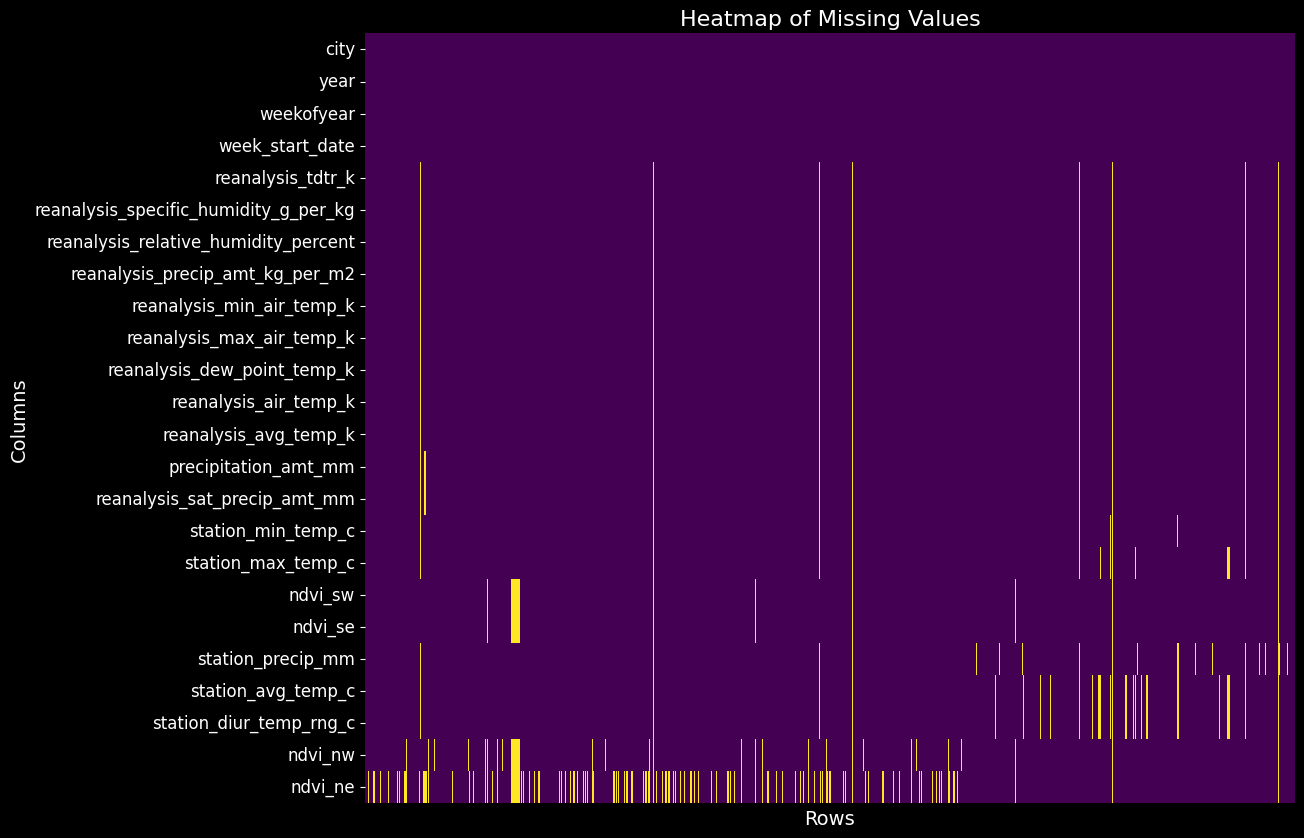

In [26]:
# Create a boolean DataFrame of missing values for all columns except 'respondent_id'
missing_values = train_features.isna()

# Calculate the sum of missing values for each variable and sort them in ascending order
sorted_columns = missing_values.sum().sort_values().index

# Reorder the missing_values DataFrame based on the sorted variables
sorted_missing_values = missing_values[sorted_columns]

# Create the figure and axis for the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
ax = sns.heatmap(sorted_missing_values.T, cbar=False, xticklabels=False, cmap='viridis')

# Set the background color of the figure (outside the heatmap)
plt.gcf().set_facecolor('black')

# Set the title and labels with white text
plt.title('Heatmap of Missing Values', color='white', fontsize=16)
plt.xlabel('Rows', color='white', fontsize=14)
plt.ylabel('Columns', color='white', fontsize=14)

# Set tick colors to white and increase font size for better readability
ax.tick_params(axis='y', colors='white', labelsize=12)

# Set the color of the axis (spine) to white
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# Optionally, rotate the y-axis labels for better readability if needed
plt.yticks(rotation=0)

# Save the figure with a black background
plt.savefig('../images/nan_heatmap.png', facecolor='black', bbox_inches='tight', pad_inches=1.0)
plt.show()

In [27]:
# Create a boolean DataFrame of missing values for all columns except 'respondent_id'
missing_values = train_features.isna()

# Calculate the sum of missing values for each variable and sort them in ascending order
sorted_columns = missing_values.sum().sort_values().index

# Reorder the missing_values DataFrame based on the sorted variables
sorted_missing_values = missing_values[sorted_columns]

# Convert the sorted boolean DataFrame of missing values to a numeric format
numeric_missing_values = sorted_missing_values.astype(int)  # 1 for True (missing), 0 for False (not missing)

# Increase the figure's height to give more space for y-axis labels
# The height might need further adjustment based on the actual number of labels
fig_height = max(600, 30 * len(sorted_columns))

fig = px.imshow(numeric_missing_values.T, color_continuous_scale='Viridis',
                labels=dict(x="Rows", y="Columns", color="Missing Values"),
                title="Heatmap of Missing Values",
                height=fig_height)  # Set custom height

# Update layout to improve aesthetics and readability of y-axis labels
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    title_font=dict(size=16, color='white'),
    xaxis=dict(showticklabels=False),
    yaxis=dict(
        tickmode='array',
        tickvals=list(range(len(sorted_columns))),
        ticktext=sorted_columns,
        tickfont=dict(size=10, color='white')  # Adjust font size as needed
    ),
    yaxis_title="Columns",
    xaxis_title="Rows"
)

# Show the figure
fig.show()

# Drop Missing Values

We decided to drop `NA` values from the whole dataset

But we're mindful that this would need to happen in communication with domain experts!

In [28]:
#train_features = train_features.dropna()
#test_features = test_features.dropna()

In [29]:
train_features.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [30]:
test_features.isna().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

# Understanding Data Types

# City and Date

`city` – City abbreviations: `sj` for San Juan and `iq` for Iquitos

`week_start_date` – Date given in `yyyy-mm-dd` format

# Daily Climate Data

`station_max_temp_c` – Maximum temperature

`station_min_temp_c` – Minimum temperature

`station_avg_temp_c` – Average temperature

`station_precip_mm` – Total precipitation

`station_diur_temp_rng_c` – Diurnal temperature range

# Satellite Precipitation Measurements

`precipitation_amt_mm` – Total precipitation

# Climate Forecast System Reanalysis

`reanalysis_sat_precip_amt_mm` – Total precipitation

`reanalysis_dew_point_temp_k` – Mean dew point temperature

`reanalysis_air_temp_k` – Mean air temperature

`reanalysis_relative_humidity_percent` – Mean relative humidity

`reanalysis_specific_humidity_g_per_kg` – Mean specific humidity

`reanalysis_precip_amt_kg_per_m2` – Total precipitation

`reanalysis_max_air_temp_k` – Maximum air temperature

`reanalysis_min_air_temp_k` – Minimum air temperature

`reanalysis_avg_temp_k` – Average air temperature

`reanalysis_tdtr_k` – Diurnal temperature range

# Satellite Vegetation

`ndvi_se` – Pixel southeast of city centroid

`ndvi_sw` – Pixel southwest of city centroid

`ndvi_ne` – Pixel northeast of city centroid

`ndvi_nw` – Pixel northwest of city centroid



# Data Type Conversions

## Target Variables

- `city`, `year` and `total_cases` are all `int64` data type

In [31]:
train_labels.dtypes

city           object
year            int64
weekofyear      int64
total_cases     int64
dtype: object

In [32]:
train_labels.describe()

,year,weekofyear,total_cases
count,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,24.675137
std,5.408314,15.019437,43.596000
min,1990.000000,1.000000,0.000000
25%,1997.000000,13.750000,5.000000
50%,2002.000000,26.500000,12.000000
75%,2005.000000,39.250000,28.000000
max,2010.000000,53.000000,461.000000


In [33]:
train_labels['year'].describe()

count    1456.000000
mean     2001.031593
std         5.408314
min      1990.000000
25%      1997.000000
50%      2002.000000
75%      2005.000000
max      2010.000000
Name: year, dtype: float64

In [34]:
train_labels.groupby(['year']).value_counts()

year  city  weekofyear  total_cases
1990  sj    18          4              1
            19          5              1
            20          4              1
            21          3              1
            22          6              1
                                      ..
2010  iq    22          8              1
            23          1              1
            24          1              1
            25          4              1
            53          0              1
Name: count, Length: 1456, dtype: int64

In [35]:
train_labels['year'].value_counts()

year
2001    104
2007    104
2006    104
2005    104
2004    104
2003    104
2002    104
2000     78
2008     69
2009     52
1991     52
1998     52
1997     52
1996     52
1995     52
1994     52
1993     52
1992     52
1999     52
1990     35
2010     26
Name: count, dtype: int64

In [36]:
train_labels['weekofyear']

0       18
1       19
2       20
3       21
4       22
        ..
1451    21
1452    22
1453    23
1454    24
1455    25
Name: weekofyear, Length: 1456, dtype: int64

In [37]:
train_labels['weekofyear'].describe()

count    1456.000000
mean       26.503434
std        15.019437
min         1.000000
25%        13.750000
50%        26.500000
75%        39.250000
max        53.000000
Name: weekofyear, dtype: float64

In [38]:
train_labels['weekofyear'].value_counts()

weekofyear
18    28
19    28
46    28
47    28
48    28
49    28
50    28
51    28
1     28
2     28
3     28
4     28
5     28
6     28
7     28
8     28
9     28
10    28
11    28
12    28
13    28
14    28
15    28
16    28
17    28
45    28
44    28
43    28
42    28
20    28
21    28
22    28
23    28
24    28
25    28
26    28
27    28
28    28
29    28
30    28
31    28
32    28
33    28
34    28
35    28
36    28
37    28
38    28
39    28
40    28
41    28
52    23
53     5
Name: count, dtype: int64

# `city`, `year`, `weekofyear`, `weekstartdate`

# `city`

In [39]:
train_features['city']

0       sj
1       sj
2       sj
3       sj
4       sj
        ..
1451    iq
1452    iq
1453    iq
1454    iq
1455    iq
Name: city, Length: 1456, dtype: object

# Convert `city` to `category` Data Type

In [40]:
train_features.loc[:,'city'] = train_features.loc[:,'city'].astype("category")
train_features['city'].describe()

count     1456
unique       2
top         sj
freq       936
Name: city, dtype: object

In [41]:
train_features['city'].value_counts()

city
sj    936
iq    520
Name: count, dtype: int64

In [42]:
type(train_features['city'][0])

str

# `year`

- There are two cities, San Juan and Iquitos, with test data for each city spanning 5 and 3 years respectively.

- `year` is `int64` data type

In [43]:
train_features.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [44]:
train_features['year'].describe()

count    1456.000000
mean     2001.031593
std         5.408314
min      1990.000000
25%      1997.000000
50%      2002.000000
75%      2005.000000
max      2010.000000
Name: year, dtype: float64

In [45]:
print(train_features['year'].dtype)

int64


In [46]:
train_features['year'].value_counts()

year
2001    104
2007    104
2006    104
2005    104
2004    104
2003    104
2002    104
2000     78
2008     69
2009     52
1991     52
1998     52
1997     52
1996     52
1995     52
1994     52
1993     52
1992     52
1999     52
1990     35
2010     26
Name: count, dtype: int64

# `week_start_date`

In [47]:
train_features['week_start_date']

0       1990-04-30
1       1990-05-07
2       1990-05-14
3       1990-05-21
4       1990-05-28
           ...    
1451    2010-05-28
1452    2010-06-04
1453    2010-06-11
1454    2010-06-18
1455    2010-06-25
Name: week_start_date, Length: 1456, dtype: object

In [48]:
type(train_features['week_start_date'][0])

str

# Data Conversions

Convert `week_start_date` to Pandas Timestamp (`datetime64[ns]`) Data Type

In [49]:
train_features.loc[:,'week_start_date'] = train_features.loc[:,'week_start_date'].astype("datetime64[ns]")

In [50]:
train_features['week_start_date']

0       1990-04-30 00:00:00
1       1990-05-07 00:00:00
2       1990-05-14 00:00:00
3       1990-05-21 00:00:00
4       1990-05-28 00:00:00
               ...         
1451    2010-05-28 00:00:00
1452    2010-06-04 00:00:00
1453    2010-06-11 00:00:00
1454    2010-06-18 00:00:00
1455    2010-06-25 00:00:00
Name: week_start_date, Length: 1456, dtype: object

In [51]:
type(train_features['week_start_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

# Save Cleaned Datasets

In [52]:
train_features.to_csv('../data/clean/train_features.csv', index=False)
train_labels.to_csv('../data/clean/train_labels.csv', index=False)
train_labels.to_pickle('../data/clean/train_labels.pkl')
train_features.to_pickle('../data/clean/train_features.pkl')
!cp '../data/dengue_features_test.csv' '../data/clean/test_features.csv'


# TODO

- Exploratory Data Analysis
- Check data types
    - `weekofyear` to pandas `datetime`
- Check NaNs
- Clean and transform datasets
- Save cleaned datasets
- Check for class imbalance in `train_labels`
- Split `train_features` and `train_labels` into `train` and `validation`
- Choose baseline model based on prediction task and data types
- Feature engineering and preprocessing of data for modeling
- Decide hyperparameters
- Build model
- Train/fit model
- Make predictions on `validation` set
- Validate model using visualisation; tune hyperparameters
- Make predictions on `test` set
- Make a submission

# Decision

- `NA` values were dropped from all datasets
- `year`, `weekofyear`, and `total_cases` were kept as `int64`
- `week_start_date` was converted to Pandas Timestamp (`datetime64[ns]`) Data Type in both `train_features`; this variable is not present in `train_labels`